In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [4]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [7]:
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
#will need to perform normalization due to massive difference in scales

In [11]:
df.corr(numeric_only=True)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [12]:
#To visualize the ouliers

<Axes: >

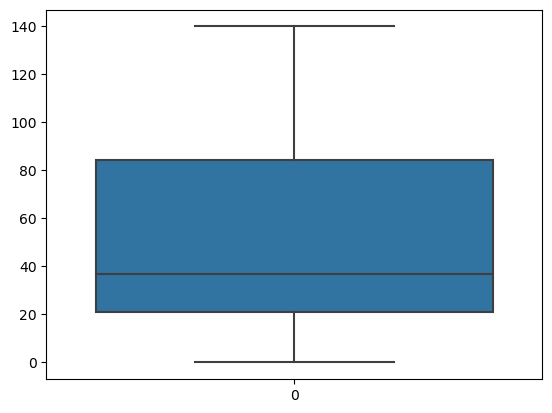

In [13]:
import seaborn as sns
sns.boxplot(df['Nitrogen'])

<Axes: >

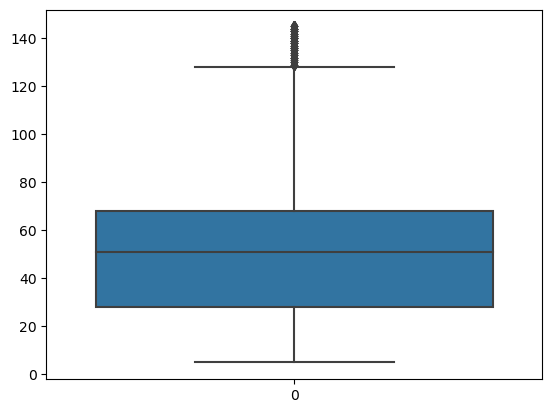

In [14]:
sns.boxplot(df['Phosphorus'])

In [15]:
df['Phosphorus'].skew()

1.0107725431372674

C:\Users\Surbhi Singh\AppData\Local\Temp\ipykernel_1224\992734491.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Phosphorus'])


<Axes: xlabel='Phosphorus', ylabel='Density'>

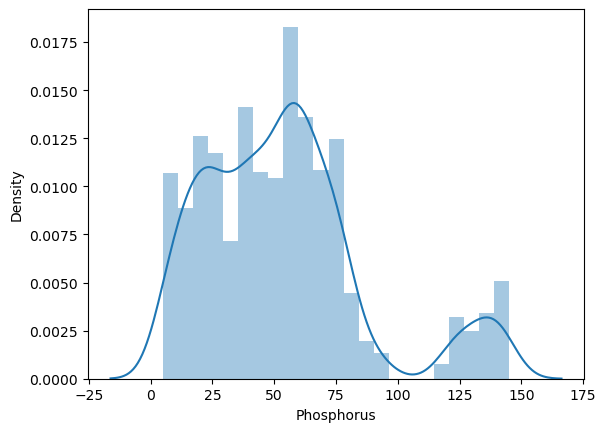

In [16]:
sns.distplot(df['Phosphorus'])

In [17]:
#handling outliers through IQR method

In [18]:
q1=df['Phosphorus'].quantile(0.25)
q3=df['Phosphorus'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

In [20]:
df[(df['Phosphorus']>ub) | (df['Phosphorus']<lb)]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1200,24,130,195,29.996772,81.541566,6.112306,67.125345,Grapes
1201,13,144,204,30.728040,82.426141,6.092242,68.381355,Grapes
1204,24,131,196,22.032962,83.743728,5.732454,65.344408,Grapes
1206,35,140,197,16.775573,82.752419,6.106191,66.762855,Grapes
1209,17,134,204,39.040720,80.183933,6.499605,73.884670,Grapes
...,...,...,...,...,...,...,...,...
1594,35,145,195,22.039115,94.580758,6.231950,110.980401,Apple
1596,25,132,198,22.319441,90.851744,5.732758,100.117344,Apple
1597,31,137,196,22.144641,93.825674,6.400321,120.631078,Apple
1598,36,144,196,23.651676,94.505288,6.496934,115.361127,Apple


In [21]:
#capping the values

df['Phosphorus']=np.where(
    df['Phosphorus']>ub,
    ub,
    np.where(
        df['Phosphorus']<lb,
        lb,
        df['Phosphorus']
    )
)

<Axes: >

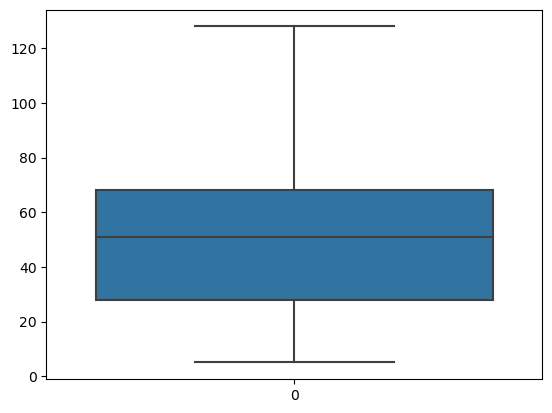

In [23]:
sns.boxplot(df['Phosphorus'])

<Axes: >

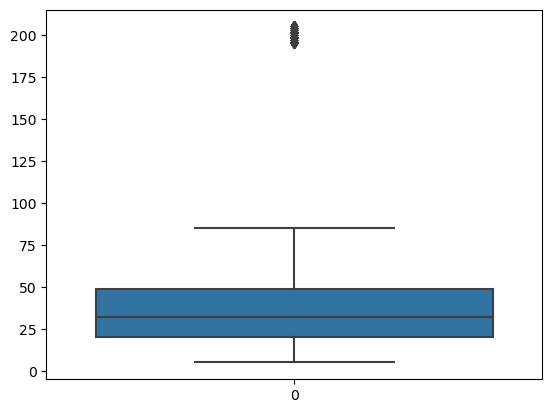

In [24]:
sns.boxplot(df['Potassium'])

In [25]:
#handling outliers through IQR method

In [26]:
q1=df['Potassium'].quantile(0.25)
q3=df['Potassium'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

In [27]:
df[(df['Potassium']>ub) | (df['Potassium']<lb)]

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
1200,24,128.0,195,29.996772,81.541566,6.112306,67.125345,Grapes
1201,13,128.0,204,30.728040,82.426141,6.092242,68.381355,Grapes
1202,22,123.0,205,32.445778,83.885049,5.896343,68.739325,Grapes
1203,36,125.0,196,37.465668,80.659687,6.155261,66.838723,Grapes
1204,24,128.0,196,22.032962,83.743728,5.732454,65.344408,Grapes
...,...,...,...,...,...,...,...,...
1595,40,120.0,197,23.805938,92.488795,5.889481,119.633555,Apple
1596,25,128.0,198,22.319441,90.851744,5.732758,100.117344,Apple
1597,31,128.0,196,22.144641,93.825674,6.400321,120.631078,Apple
1598,36,128.0,196,23.651676,94.505288,6.496934,115.361127,Apple


In [28]:
#capping the values using a function

def capping(x):
    df[x]=np.where(
        df[x]>ub,
        ub,
        np.where(
            df[x]<lb,
            lb,
            df[x]
        )
    )
    
capping('Potassium')

<Axes: >

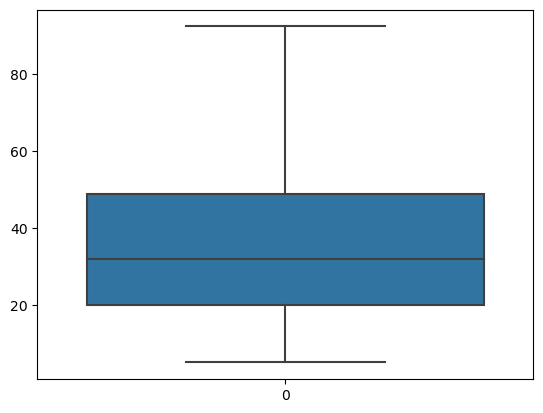

In [29]:
sns.boxplot(df['Potassium'])

<Axes: >

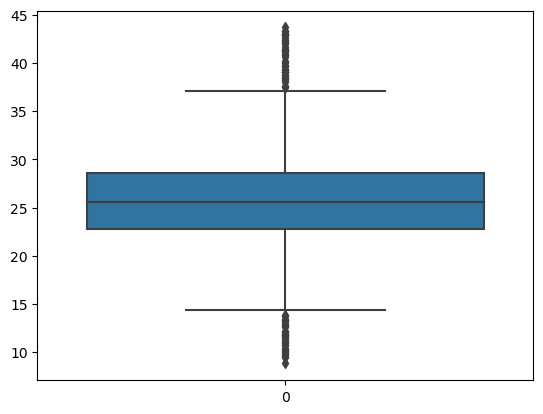

In [30]:
sns.boxplot(df['Temperature'])

<Axes: >

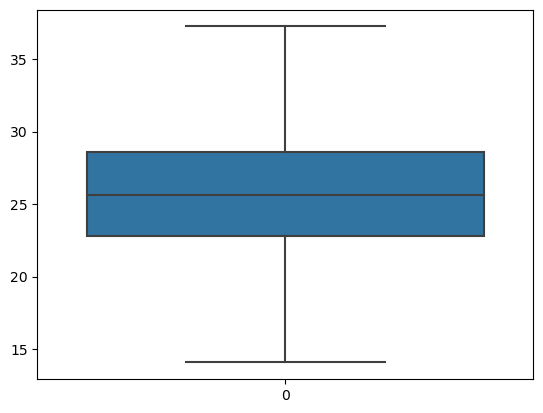

In [31]:
#handling outliers through IQR method

q1=df['Temperature'].quantile(0.25)
q3=df['Temperature'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

capping('Temperature')

sns.boxplot(df['Temperature'])

<Axes: >

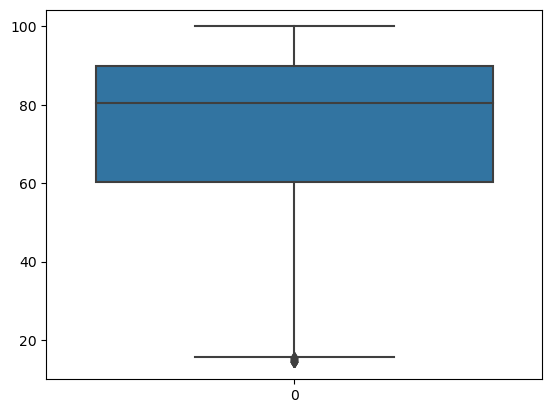

In [32]:
sns.boxplot(df['Humidity'])

<Axes: >

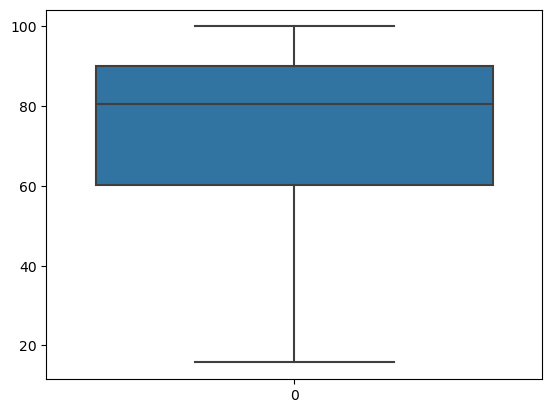

In [33]:
#handling outliers through IQR method

q1=df['Humidity'].quantile(0.25)
q3=df['Humidity'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

capping('Humidity')

sns.boxplot(df['Humidity'])

<Axes: >

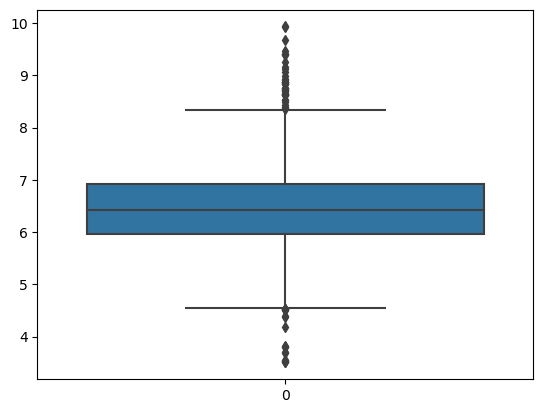

In [34]:
sns.boxplot(df['pH_Value'])

<Axes: >

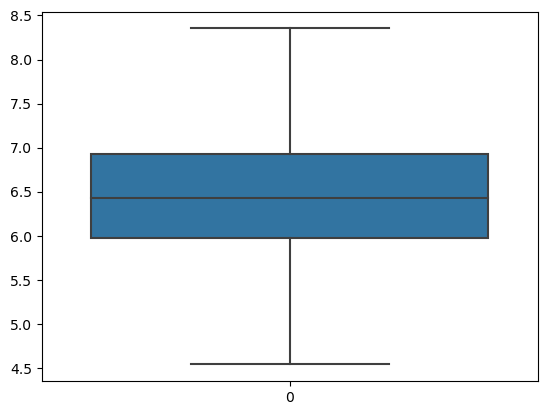

In [35]:
#handling outliers through IQR method

q1=df['pH_Value'].quantile(0.25)
q3=df['pH_Value'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

capping('pH_Value')

sns.boxplot(df['pH_Value'])

<Axes: >

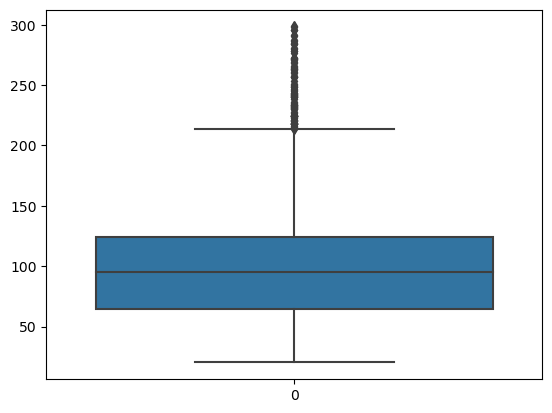

In [36]:
sns.boxplot(df['Rainfall'])

<Axes: >

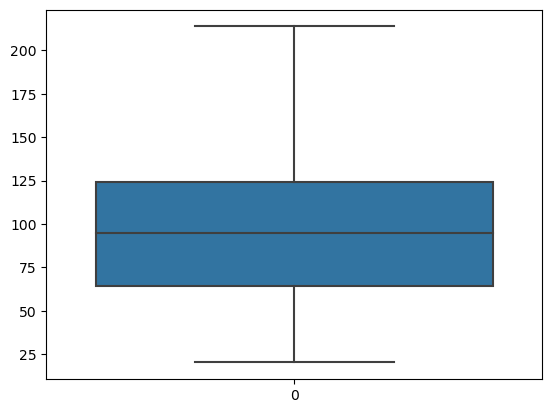

In [38]:
#handling outliers through IQR method

q1=df['Rainfall'].quantile(0.25)
q3=df['Rainfall'].quantile(0.75)
iqr=q3-q1
ub=q3+1.5*iqr
lb=q1-1.5*iqr

capping('Rainfall')

sns.boxplot(df['Rainfall'])

Train test split

In [39]:
X=df.iloc[:,:7]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [40]:
X_train

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
1936,113,38.0,25.0,22.000851,79.472710,7.388266,90.422242
610,28,35.0,22.0,29.530376,86.733460,7.156563,59.872321
372,11,61.0,21.0,18.623288,23.024103,5.532101,135.337803
1559,29,128.0,92.5,23.641424,93.744615,6.155939,116.691218
1500,24,128.0,92.5,22.750888,90.694892,5.521467,110.431786
...,...,...,...,...,...,...,...
1071,105,88.0,54.0,25.787498,84.511942,6.020445,114.200546
433,27,71.0,23.0,23.453790,46.487148,7.109598,150.871220
674,23,39.0,22.0,29.256493,81.979522,6.864839,42.024833
1099,117,81.0,53.0,29.507046,78.205856,5.507642,98.125658


In [41]:
X_test

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
2121,83,21.0,28.0,25.567483,60.492446,7.466901,190.225784
960,1,27.0,36.0,23.985988,93.342366,5.684995,104.991282
952,23,5.0,44.0,21.207254,94.263047,7.163005,107.566080
1958,116,52.0,19.0,22.942767,75.371706,6.114526,67.080226
681,6,37.0,17.0,28.086572,80.350059,6.760694,38.144768
...,...,...,...,...,...,...,...
1684,7,17.0,10.0,14.080956,91.223210,6.465913,106.362551
1477,86,18.0,45.0,28.965866,90.718329,6.566759,22.258381
851,6,64.0,23.0,23.335652,67.404607,7.065264,36.186787
370,37,56.0,25.0,22.055923,19.603793,5.774755,126.726537


## Data normalization

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [43]:
X_train

array([[0.80714286, 0.26829268, 0.22857143, ..., 0.75656819, 0.74701884,
        0.36260385],
       [0.2       , 0.24390244, 0.19428571, ..., 0.84274905, 0.68616931,
        0.2048291 ],
       [0.07857143, 0.45528455, 0.18285714, ..., 0.08655626, 0.25955478,
        0.59456981],
       ...,
       [0.16428571, 0.27642276, 0.19428571, ..., 0.78632259, 0.6095571 ,
        0.11265593],
       [0.83571429, 0.61788618, 0.54857143, ..., 0.74153138, 0.25313144,
        0.40238807],
       [0.27857143, 0.15447154, 0.10285714, ..., 0.89224425, 0.69475605,
        0.44342273]])

## Training the model

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf=RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy score: ",accuracy_score(y_test,y_pred))

Accuracy score:  0.9954545454545455


## Hyperparameter tuning using GridSearchCV

In [46]:
n_estimators=[20,60,100,120]
max_depth=[None,2,8]
max_featues=[0.2,0.6,1.0]
max_samples=[0.5,0.75,1.0]

In [47]:
#create a dictionary
param_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':max_featues,
    'max_samples':max_samples
}

In [48]:
rf=RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

rf_grid=GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1
)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 2, 8],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [49]:
rf_grid.best_score_

0.9971590909090908

In [50]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 100}